**Orginal code:**

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.7210 - val_loss: 0.7132
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.7107 - val_loss: 0.7031
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.7006 - val_loss: 0.6933
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6909 - val_loss: 0.6838
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6814 - val_loss: 0.6745
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6722 - val_loss: 0.6655
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6632 - val_loss: 0.6567
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6545 - val_loss: 0.6482
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6460 - val_loss: 0.6399
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss:

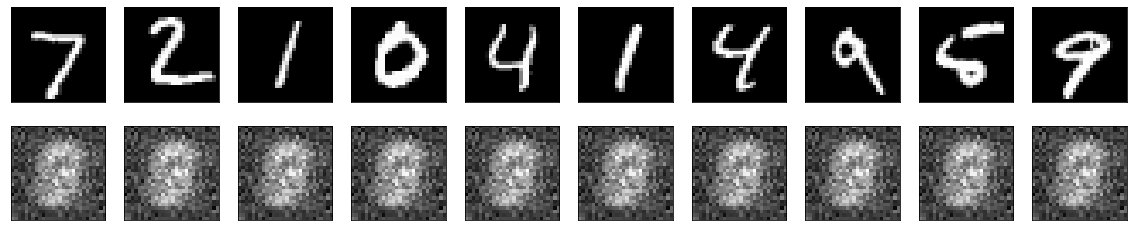

In [14]:
from keras.layers import Input, Dense 
from tensorflow.keras import regularizers
from keras.models import Model 
import matplotlib.pyplot as plt


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder

input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input


# this model maps an input to its reconstruction


# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoded = Dense(784, activation='sigmoid')(decoded)
# create the decoder model
decoder = Model(encoded_input, decoded)

out = decoder(encoder(input_img))
autoencoder = Model(input_img,out)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)),
               # max_norm_value = 2.0,
               # noise_factor = 0.55,
               # number_of_visualizations = 6
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


**Rewrtiting code and changing optimizer to 'adam':**

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.3846 - val_loss: 0.1873
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1771 - val_loss: 0.1511
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1475 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1316 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1201 - val_loss: 0.1124
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1122 - val_loss: 0.1060
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1061 - val_loss: 0.1017
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1020 - val_loss: 0.0986
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0992 - val_loss: 0.0964
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss:

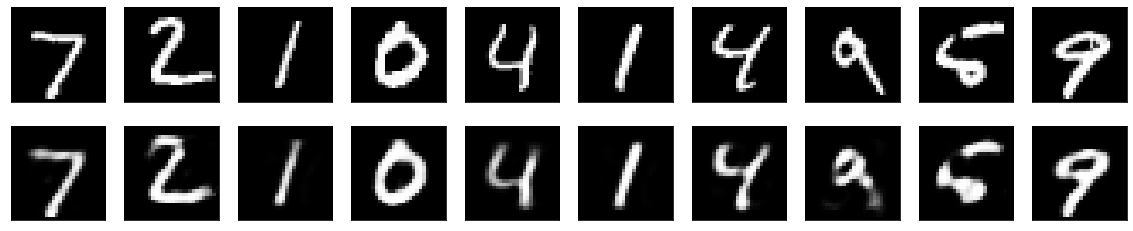

In [13]:
import keras
from keras.layers import Input, Dense
from keras.models import Model 

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Changing epochs to 100:**

(60000, 784)
(10000, 784)
Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.3809 - val_loss: 0.1933
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1830 - val_loss: 0.1552
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1504 - val_loss: 0.1343
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1322 - val_loss: 0.1216
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1208 - val_loss: 0.1129
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1126 - val_loss: 0.1071
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.1030
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1034 - val_loss: 0.1000
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1006 - val_loss: 0.0977
Epoch 10/100
235/235 [==============================] - 1s 4ms/st

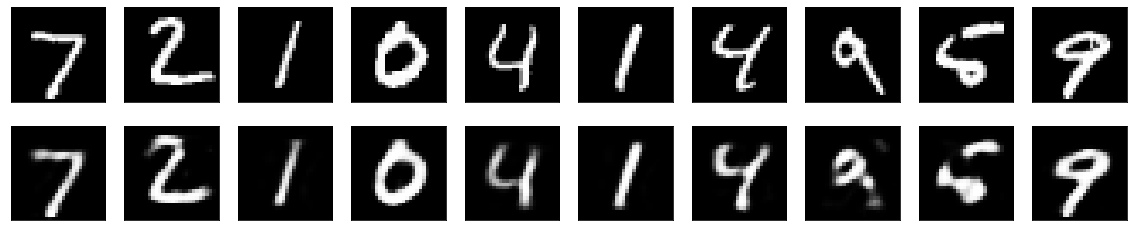

In [15]:
import keras
from keras.layers import Input, Dense
from keras.models import Model 

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Adding regularization term to encoder:**

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 0.3929 - val_loss: 0.1989
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1889 - val_loss: 0.1609
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1571 - val_loss: 0.1435
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1420 - val_loss: 0.1317
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1309 - val_loss: 0.1235
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1232 - val_loss: 0.1177
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1179 - val_loss: 0.1134
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1138 - val_loss: 0.1104
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1112 - val_loss: 0.1083
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss:

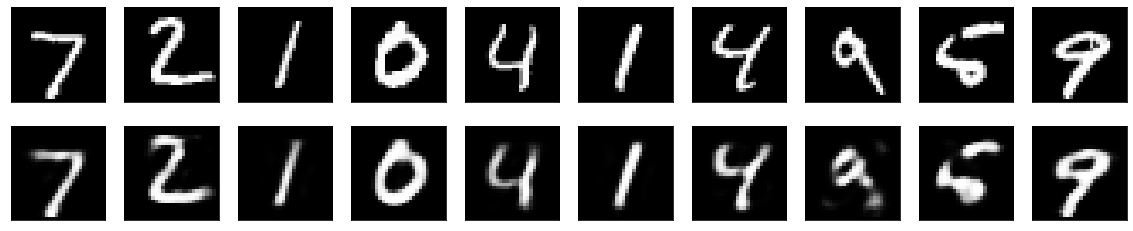

In [16]:
import keras
from keras.layers import Input, Dense
from keras.models import Model 
from keras import regularizers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()